# (5주차) 3월30일

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-wAQvICr34ePlieOT0WBZ3x

### imports 

In [85]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [86]:
import tensorflow.experimental.numpy as tnp 

In [87]:
tnp.experimental_enable_numpy_behavior() 

### 최적화의 문제 

`-` $loss=(\frac{1}{2}\beta-1)^2$ 

`-` 기존에 했던 방법은 수식을 알고 있어야 한다는 단점이 있음 

### tf.keras.optimizers를 이용한 최적화방법 

#### 방법1: opt.apply_gradients()를 이용 

In [88]:
alpha=0.01/6

In [89]:
opt = tf.keras.optimizers.SGD(learning_rate=alpha)

In [90]:
opt.lr

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0016666667>

`-` opt에 전달할 입력값을 정리해보자 

In [91]:
beta= tf.Variable(-10.0) 
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-10.0>

In [92]:
with tf.GradientTape(persistent=True) as tape:
    loss = (beta/2-1)**2 
tape.gradient(loss,beta)

<tf.Tensor: shape=(), dtype=float32, numpy=-6.0>

In [93]:
slope= tape.gradient(loss,beta)

`-` iter1: opt.apply_gradients() 에 값을 전달하여 beta를 1회 업데이트
- 주의점: `opt.apply_gradients()`의 입력으로 pair의 list를 전달해야함. 

In [94]:
opt.apply_gradients([(slope,beta)])

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [95]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` iter2 

In [96]:
with tf.GradientTape(persistent=True) as tape:
    loss = (beta/2-1)**2 
slope= tape.gradient(loss,beta)

In [97]:
opt.apply_gradients([(slope,beta)])
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.980008>

`-` for문을 이용한 반복 (정리)

In [98]:
alpha=0.01/6
opt = tf.keras.optimizers.SGD(alpha)
beta= tf.Variable(-10.0) 
for epoc in range(10000):
    with tf.GradientTape(persistent=True) as tape:
        loss = (beta/2-1)**2 
    slope= tape.gradient(loss,beta)
    opt.apply_gradients([(slope,beta)])

In [99]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

#### 방법2: opt.minimize()

In [100]:
alpha=0.01/6
opt = tf.keras.optimizers.SGD(alpha)
beta= tf.Variable(-10.0) 

In [101]:
loss_fn = lambda: (beta/2-1)**2 

`-` iter1

In [102]:
opt.minimize(loss_fn,beta)

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [103]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` iter2

In [104]:
opt.minimize(loss_fn,beta)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.980008>

`-` for문을 구하는 코드로 정리 

In [105]:
alpha=0.01/6
opt = tf.keras.optimizers.SGD(alpha)
beta= tf.Variable(-10.0) 
loss_fn = lambda: (beta/2-1)**2 
for epoc in range(10000):
    opt.minimize(loss_fn,beta)

In [106]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

`-` `tf.keras.optimizers.SGD`와 `tf.optimizers.SGD`의 차이? 없음 

(증거1) 

In [107]:
_opt1=tf.keras.optimizers.SGD()

In [108]:
_opt2=tf.optimizers.SGD()

In [109]:
type(_opt1),type(_opt2)

(keras.optimizer_v2.gradient_descent.SGD,
 keras.optimizer_v2.gradient_descent.SGD)

똑같다..? 

(증거2)

In [110]:
alpha=0.01/6
opt = tf.optimizers.SGD(alpha)
beta= tf.Variable(-10.0) 
loss_fn = lambda: (beta/2-1)**2 
for epoc in range(10000):
    opt.minimize(loss_fn,beta)

In [111]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

(증거3) 모듈위치가 같다. 

In [112]:
tf.optimizers?

Type:        module
String form: <module 'keras.api._v2.keras.optimizers' from '/home/cgb3/anaconda3/envs/py310/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py'>
File:        ~/anaconda3/envs/py310/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py
Docstring:   Public API for tf.keras.optimizers namespace.


In [113]:
tf.keras.optimizers?

Type:        module
String form: <module 'keras.api._v2.keras.optimizers' from '/home/cgb3/anaconda3/envs/py310/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py'>
File:        ~/anaconda3/envs/py310/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py
Docstring:   Public API for tf.keras.optimizers namespace.


### 회귀분석 

`-` ${\bf y} \approx 4 + 2.5 {\bf x}$

In [131]:
tnp.random.seed(43052)
N = 200 
x = tnp.linspace(0,1,N) 
epsilon = tnp.random.randn(N)*0.5

In [132]:
y= 4+2.5*x+epsilon
y_true = 4+2.5*x

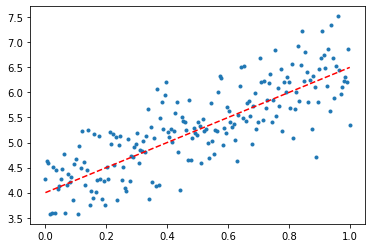

In [133]:
plt.plot(x,y,'.')
plt.plot(x,y_true,'--r')

#### 풀이1

In [134]:
Sxx = sum((x-x.mean())**2) 
Sxy = sum((x-x.mean())*(y-y.mean())) 

In [135]:
beta1_hat = Sxy/Sxx 
beta0_hat = y.mean() - beta1_hat*x.mean()

In [136]:
beta0_hat,beta1_hat

(<tf.Tensor: shape=(), dtype=float64, numpy=4.083667211565867>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.4330345167331684>)

#### 풀이2

In [137]:
X=tf.stack([tf.ones(N,dtype='float64'),x],axis=1)
y=y.reshape(N,1) 

In [138]:
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [139]:
tf.linalg.inv(X.T@X)@ X.T @y 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[4.08366721],
       [2.43303452]])>

#### 풀이3

In [140]:
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [141]:
beta= tnp.array([-5.0,10.0]).reshape(2,1)

In [142]:
slope = -2*X.T@y + 2*X.T@X@beta

In [143]:
slope

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-2120.07378797],
       [ -805.2697144 ]])>

In [144]:
alpha = 0.001

In [147]:
step = slope * alpha
step 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-2.12007379],
       [-0.80526971]])>

### 숙제 

`-` 풀이3을 완성하라. 즉 경사하강법을 이용하여 적절한 beta를 추정하라. 

- iteration 횟수는 1000번으로 설정 
- 학습률은 0.001로 설정
- beta의 초기값은 `beta= tnp.array([-5.0,10.0]).reshape(2,1)`